In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Importing Face mask dataset**

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 data	 face-mask-dataset.zip	'Screenshot 2024-12-02 at 7.30.14 PM.png'	  'with mask.jpg'
 drive	 sample_data		 Shri_Narendra_Modi,_Prime_Minister_of_India.jpg   without_mask.jpg


# **Importing Necessary Libraries**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

### **Images with Mask**

In [7]:

with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3406.jpg', 'with_mask_3579.jpg', 'with_mask_374.jpg', 'with_mask_1629.jpg', 'with_mask_1749.jpg']
['with_mask_543.jpg', 'with_mask_1079.jpg', 'with_mask_2908.jpg', 'with_mask_1859.jpg', 'with_mask_703.jpg']


## **Images without Mask**

In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1671.jpg', 'without_mask_3692.jpg', 'without_mask_3095.jpg', 'without_mask_1699.jpg', 'without_mask_3477.jpg']
['without_mask_3351.jpg', 'without_mask_93.jpg', 'without_mask_2464.jpg', 'without_mask_1198.jpg', 'without_mask_221.jpg']


In [9]:
print("Number of Images with Mask:", len(with_mask_files))
print("Number of Images without Mask:", len(without_mask_files))

Number of Images with Mask: 3725
Number of Images without Mask: 3828


## **Creating Lables for both classes**

#### **With Mask ---> 1**

#### **Without Mask ---> 0**

In [10]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## **Displaying the Image**

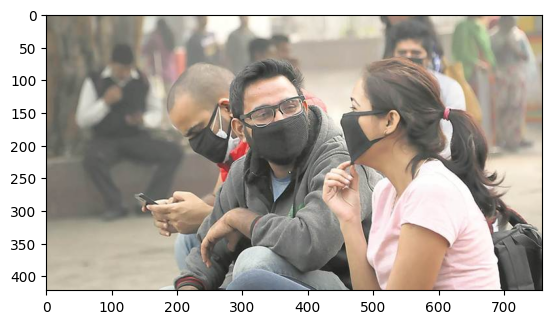

In [14]:
## Displaying with mask Image

img = mpimg.imread('/content/data/with_mask/with_mask_3406.jpg')
imgplot = plt.imshow(img)

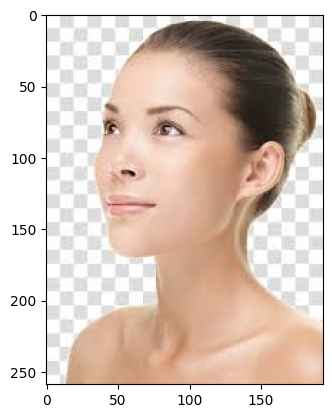

In [15]:
## Displaying wihtout mask image

img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)

## **Image Processing**


 1. Resize the Image

 2. Convert the Images to numpy arrays

In [16]:
## convert images into numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
print("Length of data is:", len(data))
print("Type of data is:", type(data))

Length of data is: 7553
Type of data is: <class 'list'>


array([[[120, 116, 104],
        [128, 124, 112],
        [134, 131, 118],
        ...,
        [189, 174, 133],
        [168, 163, 137],
        [164, 165, 151]],

       [[120, 116, 104],
        [127, 122, 111],
        [133, 130, 117],
        ...,
        [188, 173, 124],
        [169, 163, 139],
        [164, 165, 152]],

       [[119, 115, 103],
        [125, 121, 109],
        [133, 130, 117],
        ...,
        [189, 172, 116],
        [168, 163, 141],
        [165, 166, 153]],

       ...,

       [[202, 194, 175],
        [201, 193, 174],
        [200, 192, 173],
        ...,
        [ 99,  99,  97],
        [ 47,  47,  45],
        [ 60,  60,  58]],

       [[204, 196, 177],
        [205, 197, 178],
        [206, 198, 179],
        ...,
        [109, 109, 107],
        [ 50,  50,  48],
        [ 56,  56,  54]],

       [[205, 197, 178],
        [206, 198, 179],
        [206, 198, 179],
        ...,
        [107, 107, 105],
        [ 55,  55,  53],
        [ 54,  54,  52]]], dtype=uint8)
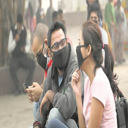

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
## converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)


In [22]:
type(X)
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


## **Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=42)


In [25]:
print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X: (7553, 128, 128, 3)
Shape of X_train: (6042, 128, 128, 3)
Shape of X_test: (1511, 128, 128, 3)


In [26]:
## Scaling the data

X_train_scaled = X_train /255
X_test_scaled = X_test/255

# **Building a Convolutional Neural Network**

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (128,128,3)))
keras.layers.MaxPooling2D(pool_size=(2,2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
keras.layers.MaxPooling2D(pool_size=(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
## Compile the model

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 984064)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     125,960,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,988,098 (480.61 MB)

 Trainable params: 125,988,098 (480.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
## Training the model

history = model.fit(X_train_scaled, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.6943 - loss: 1.5918 - val_accuracy: 0.8883 - val_loss: 0.2806
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.8713 - loss: 0.3219 - val_accuracy: 0.8941 - val_loss: 0.2768
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9041 - loss: 0.2645 - val_accuracy: 0.9049 - val_loss: 0.2349
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9106 - loss: 0.2383 - val_accuracy: 0.9165 - val_loss: 0.2286
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9312 - loss: 0.1625 - val_accuracy: 0.9206 - val_loss: 0.2280
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9318 - loss: 0.1872 - val_accuracy: 0.9165 - val_loss: 0.2409
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9567 - loss: 0.1272 - val_accuracy: 0.9115 - val_loss: 0.3040
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9730 - loss: 0.0729 - v

## **Model Evaluation**

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy:", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9247 - loss: 0.2410
Test Accuracy: 0.9258769154548645


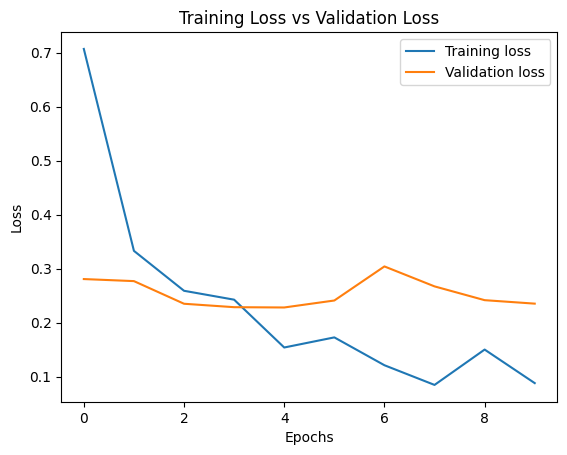

In [33]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

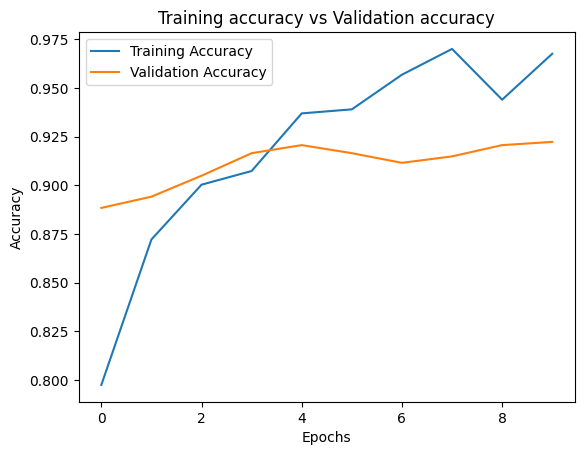

In [34]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Training accuracy vs Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Predictive System**

Path of the image to be predicted: /content/with mask.jpg


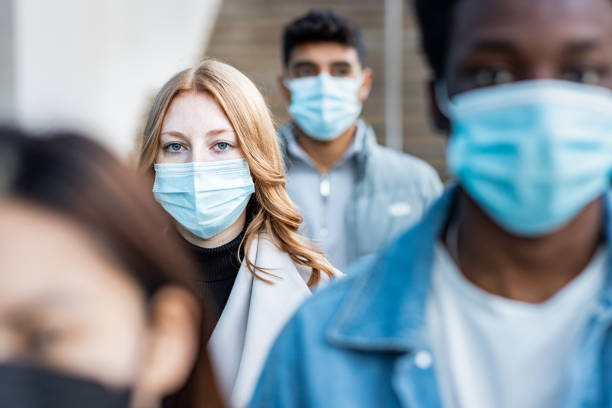

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.1446079  0.76040274]]
1
The preson in the image is wearing a mask


In [37]:
input_img_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_img_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The preson in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")
